<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/Chap_13_Applied_Data_Science_20230728.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13.<font color="Crimson">Reinforcement learning - part2</font>

We have already learned the Reinforcement basics in the part1, such as environment, agent, Q-value, Q-table.

**Today's highlight**：
- 1. epsilon-greedy
- 2. Deep Q-learning


##13.1 <font color='crimson'>$\varepsilon$-greedy</font>

Let's consider the following issue.

<div align="center">
<img src="https://drive.google.com/uc?export=view&id=1Ed9uN-QXIo8ksUjTL-U58CKNqsz6XJo6" width="100%">

**Figure 13.1 Can the agent find the higher reward?**
</div>

For the agent , it will "realize" that the **Q-value** of the act of going right is higher only after agent visit block 8 and get the <font color='crimson'>**+500**</font> reward. In other words, you need to try to reach block 8 once.

　But in this example, the agent in block 5, when deciding on the first step, decides that going "up" has a higher Q value than the act of going "right" under the Q learning method, so it always goes up, and the episode ends as is. The next episode will follow the same process, never trying to go to the right.

In other words, since the agent do not consider blocks 3, 4, and 8, whose rewards are not visible in the initial action, agent will lose the opportunity to even explore these three blocks.

$\varepsilon$-greedy$method was thought of as a measure for this problem. The logic is simple: with a certain probability, the agent takes a random action that is not based on the **Q-value**, so as to explore a wide range of possibilities, as illustrated in the following figure.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=1Ec5DPJGjUSLi4DME81G96eUzRid9YlVd" width="80%">

**Figure 13.2  $\varepsilon$-greedy**
</div>

When fixed, $\varepsilon=0.1$, the agent has a 10% chance of proceeding in the direction of randomness and a 90% chance of acting based on the **Q-value**. This random action is called **epsilon** and the action based on the **Q-value** is called **greedy**.

If epsilon not fixed, as an example, set $\varepsilon=0.95$ until an episode $Episode_{m}$ and gradually reduce to $\varepsilon=0.1$ until $Episode_{m+n}$. This is an image of not relying too much on the **Q-value** in the beginning, but having the agents **search** broadly, and after accumulating some data, gradually move to actions based on the **Q-value**. The advantage of not fixing the **Q-value** is that this setting is more intuitively rational, and the agents can be trained better in terms of experience because they can accumulate data through a greater variety of actions. The disadvantage is that the initial settings, such as the initial and final values of ″varepsilon$, $m$, $n$, and how to reduce ″varepsilon$, are complex and may hinder training if not set up in a rational way.

### <font color='crimson'>**[Practice 1]** $\varepsilon$-greedy</font>

Try to implement the fixed $\varepsilon$-greedy method.

- Please refer to `def act(self)` and implement it with `def epsilon_greedy_act(self)`.

- It is already set to $\varepsilon=0.3$.

<details>

<summary> Hint1 -  random decision</summary>

`np.random.uniform()` will return a random value from 0~1. Use this.

</details>

In [ ]:
import numpy as np


2

In [ ]:
# Agent

import numpy as np

class My_Agent2:
    ## Q-learning based Agent

  def __init__(
          self,
          alpha=.2,
          epsilon=.1,
          gamma=.99,
          actions=None,
          observation=None):

    '''
    alpha      : learning rate
    gamma      : discount rate
    epsilon    : Exploration rate <- We will learn later, ignore this here.
    actions    : Actions that the agent can execute.
    observation: The environment the agent can observe (Only it's own position in this case.)
    '''

    self.alpha = alpha
    self.gamma = gamma
    self.epsilon = epsilon

    # Initialize

    self.actions = actions
    self.state = str(observation) #If the position is (0, 0), then the state is '[0, 0]'.

    # Reserve for the previous state and action (for learning)
    self.previous_state = None
    self.previous_action = None

    # Create the first Q-value dictionary. <- Use a dictionary rather than a matrix Q-table for generalization the function.
    self.q_values = {}
    self.q_values[self.state] = np.zeros(len(self.actions))

    # Recording

    self.reward_history = []


  def act(self):
    # Agent will take action accoring to the q-value.
    action = np.argmax(self.q_values[self.state])

    # Save the action
    self.previous_action = action
    return action

  ######### Your code here.
  def epsilon_greedy_act(self):

    if self.epsilon < np.random.uniform():
      # move based on epsilon
      action = np.random.randint(0, 4)
    else:
      # move based on greedy
      action = np.argmax(self.q_values[self.state])

    # Save the action
    self.previous_action = action
    return action

  ##################################


  def observe(self, state, reward, learn = True):

    # Observe and update the current state and update the Q-value dictionary as needed.

    # If it is the first block you enter, the Q value of all actions in this block is set to 0.
    # e.g., when an agent enters block [1, 1] for the first time,
    # self.q_values['1, 1'] = [0, 0, 0, 0]
    if state not in self.q_values:
      self.q_values[state] = np.zeros(len(self.actions))


    self.previous_state = self.state
    self.state = state

    if learn:
      self.reward_history.append(reward)
      self.learn(reward)

  def learn(self, reward):
    # Update the Q-table

    # Q(s_t, a)
    q = self.q_values[self.previous_state][self.previous_action]

    # maxium q-value for the next action
    max_q = np.max(self.q_values[self.state])

    # Q(s_t, a) = Q(s, a) + alpha*(reward + gamma * max{Q(s_t+1, p)}-Q(s_t, a))
    self.q_values[self.previous_state][self.previous_action] = q + \
        (self.alpha * (reward + (self.gamma * max_q) - q))



Then, let's try the effect on the example in **Figure 13.1**. Make a change to ``self.reward()`` in the code ```My_Room```.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Environment Class

# A room with a garbage
class My_Room:

    def __init__(self, map=None):

        # Type of blocks
        self.block_type = {
            "N": 0,  # Normal Block
            "G": 1,  # Block with garbage
        }

        # Action
        self.actions = {
            "UP": 0,
            "DOWN": 1,
            "LEFT": 2,
            "RIGHT": 3
        }


        '''
        # Room

        # x o o o#   o Normal Block
        # + o o x#   * Block with garbage
                    + Position of Agent
        '''

        if map is None:

          self.room = np.zeros((2, 3))

          # Set the garbage
          self.room[1][2] = 1
        else:
          self.room = map.copy()


        self.H = len(self.room) #  Row number
        self.W = len(self.room[0]) # Column number

        # Initialize
        self.start_pos = (0, 0)   # Start point of agent
        self.agent_pos = self.start_pos

        # Save
        self.total_reward = 0 # reward
        self.steps = 0

        # Max step
        self.max_step = 10

    def move(self, action):
      new_x, new_y = self.agent_pos

      if action == self.actions["UP"]:
          new_y += 1
      elif action == self.actions["DOWN"]:
          new_y += -1
      elif action == self.actions["LEFT"]:
          new_x += -1
      elif action == self.actions["RIGHT"]:
          new_x += 1


      # Won't move if it reaches to the end of the block
      Over = False
      if new_x < 0 or new_x >= self.W:
          Over = True

      if new_y <0 or new_y >= self.H:
          Over = True

      # If there are any other conditions

      ##

      # If can not move, we will stay in the current position.
      if Over:
        return self.agent_pos[0], self.agent_pos[1]

      else:
        return new_x, new_y


    def step(self, action):
        """
        input:
              action: The action the agent took

        output:
              state : The position of the agent
              reward: reward got from this action
              end   : check if the episode is end
        """

        # 1. Move
        new_x, new_y = self.move(action)

        # 2. Update position
        self.agent_pos = new_x, new_y

        # 3. Calculate reward
        reward = self.reward(new_x, new_y)
        self.total_reward += reward

        # 4. Check whether the episode is over.
        is_goal = self.end_of_episode(new_x, new_y)
        self.steps += 1

        return self.agent_pos, reward, is_goal

    def end_of_episode(self, x, y):


        """
        Function to check if the we reach the end of the episode.
        In this case, we only need to arrive at the block where the garbage is located, so we can make a decision based on the current coordinates alone.
        """
        if self.room[y][x] == self.block_type["G"] or self.steps==self.max_step:      # If we arrived at the block with garbage
            return True
        else:
            return False

    def reward(self, x, y):
        # Normal Block -1
        if self.room[y][x] == self.block_type["N"]:
            return -1

        # If current position has garbage -1 + 100

        # Close garbage = 100, farther garbage = 500
        elif self.room[y][x] == self.block_type["G"]:
          if y == 0 and x== 3:
            return 49
          else:
            return 9

    def reset(self):
        self.agent_pos = self.start_pos
        self.steps = 0
        self.total_reward = 0
        return self.start_pos

    def plot_room(self):
        np_room = np.array(self.room)
        shape = np_room.shape

        # Use red ● to display Agent

        plt.figure(figsize=(7, 5))
        plt.scatter(self.agent_pos[0] + 0.5, self.agent_pos[1] + 0.5, lw=20, color='red')

        # Use blue ● to display garbage

        g_pos = np.where(np_room == 1) # Position of garbage
        n_g = len(g_pos[0]) # Number of Garbage
        gx = [] # Axis x
        gy = [] # Axis y

        for i in range(n_g):
          plt.scatter(g_pos[1][i]+0.5, g_pos[0][i]+0.5, lw=20, color='blue')


        ## Show Blocks
        # y
        for y in range(shape[0]+1):
          plt.hlines(y, 0, shape[1])

        # x
        for x in range(shape[1]+1):
          plt.vlines(x, 0, shape[0])


        plt.xlim(-1, shape[1] + 1)
        plt.ylim(-1, shape[0] + 2)

        plt.legend(['Agent','Garbage'], fontsize=20)

        plt.grid(False)

        # reward plot
        plt.text(0, 3, f'Reward:{self.total_reward}', fontsize=20)

        plt.show()





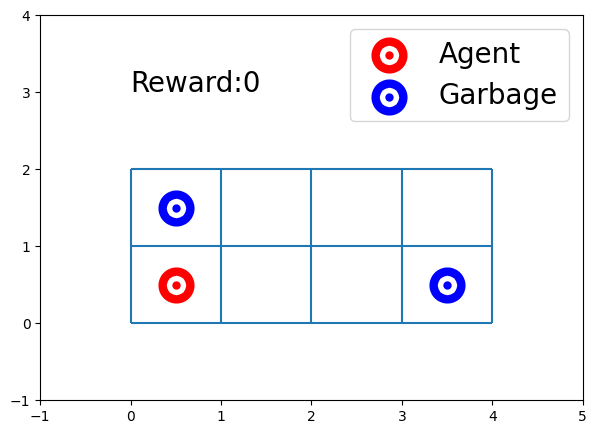

In [ ]:
#　Setting room
room2 = np.zeros((2, 4))
# Setting Garbage
room2[1][0] = 1
room2[0][3] = 1

env =My_Room(room2)
env.plot_room()


Now the episode ends when you enter the room with either garbage, with the closer garbage set to <font color='crimson'>**+100**</font> and the farther one to <font color='crimson'>**+500**</font>. Now let's compare the two learning methods.

In [ ]:
# Agent without epsilon-greedy

import numpy as np

class My_Agent:
    ## Q-learning based Agent

  def __init__(
          self,
          alpha=.2,
          epsilon=.1,
          gamma=.99,
          actions=None,
          observation=None):

    '''
    alpha      : learning rate
    gamma      : discount rate
    epsilon    : Exploration rate <- We will learn later, ignore this here.
    actions    : Actions that the agent can execute.
    observation: The environment the agent can observe (Only it's own position in this case.)
    '''

    self.alpha = alpha
    self.gamma = gamma
    self.epsilon = epsilon

    # Initialize

    self.actions = actions
    self.state = str(observation) #If the position is (0, 0), then the state is '[0, 0]'.

    # Reserve for the previous state and action (for learning)
    self.previous_state = None
    self.previous_action = None

    # Create the first Q-value dictionary. <- Use a dictionary rather than a matrix Q-table for generalization the function.
    self.q_values = {}
    self.q_values[self.state] = np.zeros(len(self.actions))

    # Recording

    self.reward_history = []


  def act(self):
    # Agent will take action accoring to the q-value.
    action = np.argmax(self.q_values[self.state])

    # Save the action
    self.previous_action = action
    return action


  def observe(self, state, reward, learn = True):

    # Observe and update the current state and update the Q-value dictionary as needed.

    # If it is the first block you enter, the Q value of all actions in this block is set to 0.
    # e.g., when an agent enters block [1, 1] for the first time,
    # self.q_values['1, 1'] = [0, 0, 0, 0]
    if state not in self.q_values:
      self.q_values[state] = np.zeros(len(self.actions))


    self.previous_state = self.state
    self.state = state

    if learn:
      self.reward_history.append(reward)
      self.learn(reward)

  def learn(self, reward):
    # Update the Q-table

    # Q(s_t, a)
    q = self.q_values[self.previous_state][self.previous_action]

    # maxium q-value for the next action
    max_q = np.max(self.q_values[self.state])

    # Q(s_t, a) = Q(s, a) + alpha*(reward + gamma * max{Q(s_t+1, p)}-Q(s_t, a))
    self.q_values[self.previous_state][self.previous_action] = q + \
        (self.alpha * (reward + (self.gamma * max_q) - q))



In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt

# Settings
N_EPISODE = 1000    # Episode number
EPSILON = .4    # Exploration rate
ALPHA = .1      # Learning rate
GAMMA = .90     # Discount rate
ACTIONS = np.arange(4)  # The actions [0->Up, 1->Down ...]

np.random.seed(0)

# Initialize the env
env = My_Room(room2)
ini_state = env.start_pos  # The intial state

# Initialize the Agnet
agent = My_Agent2(
    alpha=ALPHA,
    gamma=GAMMA,
    epsilon=EPSILON,
    actions=ACTIONS,
    observation=ini_state)

# Records
rewards = []    # Record the total rewards per episode
steps = [] # Record the steps for each episode
end_of_episode = False  # whether the episode is over

# Experiment
for episode in tqdm(range(N_EPISODE)):
  episode_reward = 0  # 1 Total reward
  while(end_of_episode== False):    # While not end
    action = agent.epsilon_greedy_act()  # Agent's action
    state, reward, end_of_episode = env.step(action) # The env change
    agent.observe(state, reward)   # Agent observe new env and update the q-table

    episode_reward += reward  # reward

  rewards.append(episode_reward)  # Save the rewards
  steps.append( env.steps )  #　Save the steps
  state = env.reset()  # Initialize the environment
  agent.observe(state=str(state), reward=None, learn=False)    # Initialize the Agnet
  end_of_episode = False


  0%|          | 0/1000 [00:00<?, ?it/s]

Minimum Steps：1


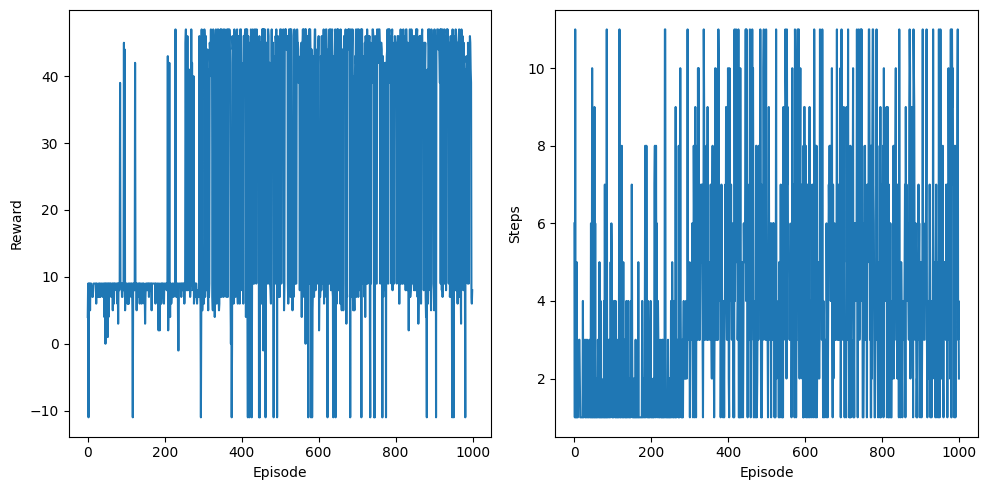

In [ ]:

# Result
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(np.arange(N_EPISODE), rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.savefig("result.jpg")


plt.subplot(1,2,2)
plt.plot(np.arange(N_EPISODE), steps)
plt.xlabel("Episode")
plt.ylabel('Steps')
plt.savefig("step.jpg")

print('Minimum Steps：%i' % np.min(steps) )
plt.tight_layout()
plt.show()


The results show that with the previous training method, the agent does not go to the right at all.

  Next, let's try training with the $\varepsilon$-greedy method. Just change ``agent.act()`` to ``agent.epsilon_greedy_act()``.

With the $\varepsilon$-greedy method, the first 500 or so times the agent took the reward in the upper room, but as the number of times increased, the agent gradually began to search the right room, finally approaching the global optimal solution in this problem rather than the local one. Of course, since $\varepsilon$ is fixed at 0.3, the result is not quite stable because the random search behavior is performed stochastically with a relatively high probability until the end. By setting $\varepsilon$ dynamically, we can alleviate this problem.


## 13.2. <font color="Crimson">Deep Q-learning (DQN)</font>


### <font color='crimson'>DQN Basics</font>

The key to reinforcement learning using the **Q learning method** is how to properly estimate the **Q values**. However, the **Q-value table** or **Q-value dictionary** used in the **Q learning method** is very costly and difficult to compute because the number of combinations is very large, such as the number of states and the set of actions to be taken is very large or the optimization of actions by long-term movements. Therefore, using a neural network model, **Q-values** can be approximated by deep learning instead of tables or dictionaries, and this method is called **Deep q learning (DQN)**.

To use a neural network, of course, you need $X$ input data and $Y$, the teacher data. Since one of the goals of the **Q learning method** is to find the optimal **Q value**, **DQN** assumes $Q(s_t, a)$ as pseudo-supervisor data. The following equation can be used to define the loss function.

$$
\hat{Q}_t(s_t, a) = r_t + \gamma \times max(Q_{t+1}(s_{t+1},p)) \tag{13.1}
$$

$$
L_t = \frac{1}{2}(\hat{Q}_t(s_t, a) - Q_t(s_t, a))^2 \tag{13.2}
$$

This formula is known as **Bellman equation**. The basic idea is the same as the **Q learning method**, but the actual $Q_t$ and $Q_{t+1}$ are not known because there is no **Q table**. Therefore, a **Policy Neural Network** (henceforth abbreviated as **PolicyNet**) that approximates **$Q_t$** from states, actions, and $Q_{t+1}$ are approximated by a **Target neural network** (henceforth abbreviated as **TargetNet**). The details can be represented as shown in the figure below.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=14qLS2Yyeie4y3MR3P8b7ZRRoprAfh_lS" width="80%">

**Figure 13.2  The overview of DQN**
</div>

- **PolicyNet** are models for approximating **true $Q_t$** and are subject models to be trained on **DQN**.

- **TargetNet** are models for approximating **$Q_{t+1}$**, which are not trained directly from the data, but are updated with **Target nets** at each constant episode.

> Why we need two networks?

Let's assume that only **PolicyNet** is used. In **DQN**, $Q_t$ and $Q_{t+1}$ must be approximated, but ${Q}_t$ calculated with $Q_{t+1}$ in equation (13.1) and $Q_t$ in equation (13.2) are generated from the same neural net, and the independence of the pseudo-supervisor data used in the loss function and the estimates It will be lost, and you will be training yourself with the teacher data you generated, which makes the training unstable. Therefore, it is better to generate estimates from the **TargetNet** and pseudo-supervisor data from the **PolicyNet**, which leads to more stable estimation.




### <font color='crimson'>Implementation in pytorch</font>

Now let's implement it with **PYTORCH**.

　Although there are various training methods depending on the type of data and the purpose of analysis, here is a typical example.

- 1) Set $\varepsilon$ high and let the agents search widely and accumulate data.

- 2) Save $[state, action, state after action, reward, end]$ for each time as data. The variable name of the destination is ``memory``.

- 3) After you have stored some data (e.g., for 300 steps), start training **PolicyNet**.

- 4) Replace the **TargetNet** with the **PolicyNet** every certain number of steps (e.g. 30 steps).

　We will start by writing a simple **PolicyNet**.

In [ ]:
import torch
from torch import nn

# PolicyNet

class My_Net(nn.Module):
    def __init__(self, n_state, n_action):
        super(My_Net, self).__init__()
        self.nn1 = nn.Linear(n_state, 64)
        self.nn2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, n_action)

    def forward(self, x):
        x = F.relu(self.nn1(x))
        x = F.relu(self.nn2(x))
        x = self.out(x)
        return x

DQN does not use the **Q learning method** or **Q tables**, but uses deep learning to learn **Q values**. Thus, much of the agent class code can be eliminated.

In [ ]:
# Agent
import numpy as np

class My_DQN_Agent:
    ## Agent

  def __init__(self, actions):
    # The actions
    self.n_action = len(actions)

  def epsilon_greedy_act(self, epsilon, states, policyN):
    # epsilon: the current spsilon
    # states:　mini_batch data from the memory
    # policyN: policy Net

    maxq = None
    # ε-greedy
    if np.random.uniform() < epsilon:  # random action
      action = np.random.randint(0, self.n_action)

    else:   # greedy
      # q values for each action
      qs = policyN(states)
      # Take maxQ and the action
      maxq, action = torch.max(qs.data, 1)

    # return the maximum q value for this state, and also the action.
    return maxq, int(action)


Various initial settings are then determined.Many settings can be tuned through trial and error to more appropriately train.

In [ ]:
# Initialization

from collections import deque

# Neural Network
BATCH_SIZE = 32   # Batch size
TRAIN_INTERVAL = 50 # Training interval, when 10, we train the model once each 10 steps.
LR = 1e-2 # Learning rate

# RF (Reinforcement learning)

N_EPISODE = 2000     # Episode number (Epochs)
UPDATE_INTERVAL = 500 # Interval of update the TargetNet from PolicyNet
START_STEP = 200     # We start training after a certain steps
MAX_LEN = 512     # Max steps we save in our memory
GAMMA = 0.9 # Discount rate

# epsilon-greedy
EPSILON = 1.              # The initial value
EPSILON_DECREASE = 0.0008 # Decrease speed
EPSILON_MIN = 0.01         # Minimum value
EPSILON_START = 300       # When to start decrease



Also, although not required, you can use [``deque()``](#ref_function_deque) in ``collections`` instead of **python** lists to limit the maximum amount of data that can be stored, and when the maximum amount of data is reached, the new The list will automatically delete old data as data is entered. The advantages of deleting old data are as follows,

- 1. memory savings

- 2. increase training efficiency by deleting old training data that has not been properly trained.

In [ ]:
from collections import deque

memory = deque(maxlen=3)
memory += [1,2,3]
print(memory)
memory += [4]
print(memory)

deque([1, 2, 3], maxlen=3)
deque([2, 3, 4], maxlen=3)


Finally, we create a **DataLoader** for memory data. This is our training dataset which generated by the actions of agent.

In [ ]:
from torch.utils.data import DataLoader, Dataset

# memory[0] = [State, action, Next_state, reward, end]

class My_Memory_Data(Dataset):
   def __init__(self, memory):
        #Initialization
        self.memory = memory

   def __len__(self):
        #len of the data
        return len(self.memory)

   def __getitem__(self, index):
        # Take one data
        # state, action, next_action, reward, end
        return memory[index]

cpu


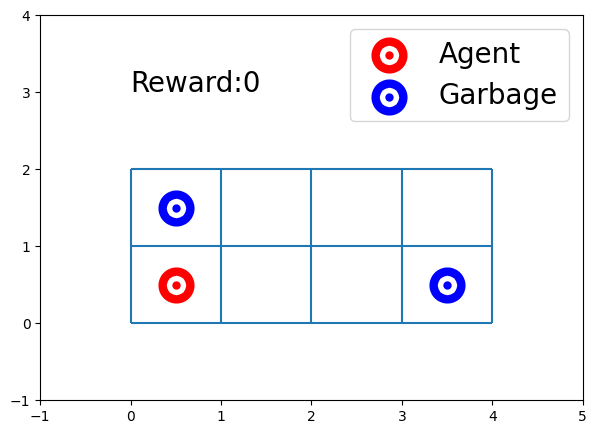

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
# Main code

from collections import deque
import torch.optim as optim
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from torch.nn import functional as F
import torch
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(0)
np.random.seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

memory = deque(maxlen=MAX_LEN) # List we store our data.

# Room
room2 = np.zeros((2, 4))
# Garbage
room2[1][0] = 1
room2[0][3] = 1

env =My_Room(room2)
env.plot_room()

# Agent
agent = My_DQN_Agent(env.actions)

init_state = env.start_pos

n_state = len(env.start_pos) # How many state (here we only use position so 2)

# Networks
policyN = My_Net(n_state, len(env.actions)).to(device)
targetN = My_Net(n_state, len(env.actions)).to(device)

optimizer = optim.Adam(policyN.parameters(), lr=LR)
criterion = nn.MSELoss()

epsilon = EPSILON # epsilon

total_steps = 0

# save total rewards for episodes
loss_history = []
rewards_history = []
epsilon_history = []

# interval of save the model
SAVE_INTERVAL = 100


# Start loop
for episode in tqdm(range(N_EPISODE)):

  # Initialize each loop
  end_of_episode = False
  episode_reward = 0
  env.reset()
  state =  torch.tensor(init_state).float()
  # Start episode
  while end_of_episode is False:

    ######################  1. Store the data ######################################

    #print(state)
    # Take action with the current state and PolicyNet
    maxq, action = agent.epsilon_greedy_act(epsilon=epsilon, states=state.view(1,-1).to(device), policyN=policyN)

    # Gains state change, reward, and end judgment in STEP.
    next_state, reward, end_of_episode = env.step(action)

    next_state = torch.tensor(next_state).float()
    #print(next_state)

    # Store the data
    # memory need: state, action, next_state, reward and end flag to calculate the formula (13.1)
    # in order to train in the torch, every elements should be scalar or 1st order tensor data.
    memory.append([state.view(-1), action, next_state.view(-1), reward, end_of_episode])

    # next_state <- state　Update
    state = next_state.clone()

    # cumulate the reward
    episode_reward += reward



    # Once a certain amount of data is accumulated, training begins
    ######################  2.  Start training #######################################

    # Check the size of the data
    if len(memory) > START_STEP:

      # Training interval
      if total_steps % TRAIN_INTERVAL == 0:

        # Make training batch from the memory
        memory_dataset = My_Memory_Data(memory)
        memory_loader = DataLoader(memory_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         drop_last=True)
        total_loss = 0
        for batch in memory_loader:
          state_batch = batch[0].to(device)
          action_batch = batch[1].to(device)
          next_state_batch = batch[2].to(device)
          reward_batch = batch[3].to(device)
          end_batch = batch[4].to(device)

          # Maxium q from policyNet
          q = policyN(state_batch)

          # q_{t+1}
          q_1_max = targetN(next_state_batch).max(1)[0].clone()

          q_hat = q.clone()
          for i in range(BATCH_SIZE):
            # q_hat = r + gamma * max(q_{t+1}) * end
            q_hat[i, action_batch[i]] = reward_batch[i] + GAMMA * q_1_max[i].data * (not end_batch[i])


          loss = criterion(q, q_hat)
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()

          total_loss = loss.item()

        loss_history.append(total_loss / len(memory_loader))



    ######################  3.  Update #######################################
    # step
    total_steps += 1

    # TargetNet
    if total_steps % UPDATE_INTERVAL == 0:
      # Transfer all the weights from PolicyNet
      targetN.load_state_dict(policyN.state_dict() )



  #### After one episode

  # epsilon
  if epsilon >= EPSILON_MIN and episode >= EPSILON_START:
    epsilon -= EPSILON_DECREASE


  rewards_history.append(episode_reward)
  epsilon_history.append(epsilon)

  # save
  if episode % SAVE_INTERVAL ==0:
    torch.save(policyN, f'PolicyNet_{episode}.torch')






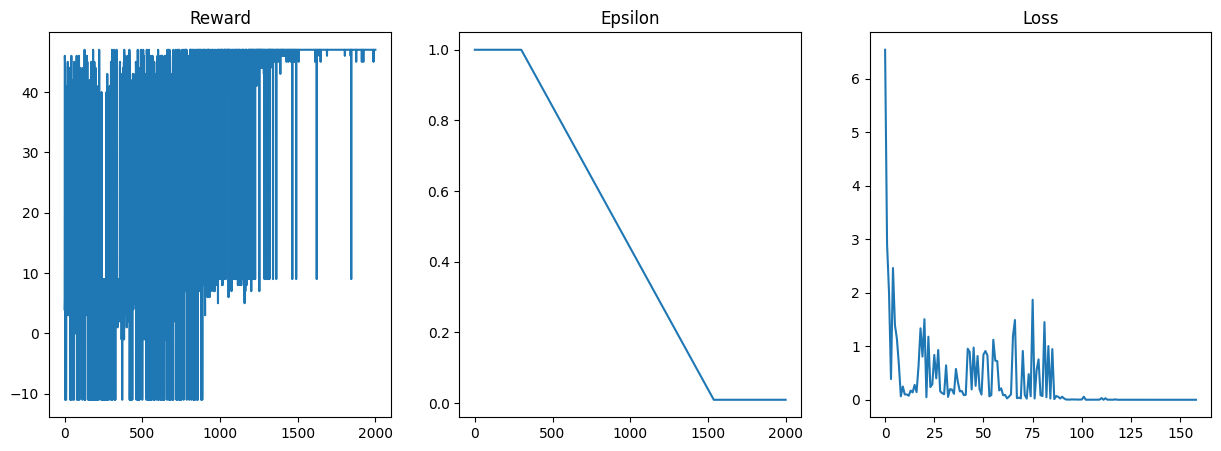

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(rewards_history)
plt.title('Reward')
plt.subplot(1,3,2)
plt.plot(epsilon_history)
plt.title('Epsilon')
plt.subplot(1,3,3)
plt.plot(loss_history)
plt.title('Loss')
plt.show()


The results show that after about 1000 episodes, it stabilizes near 500, the maximum reward. Of course, since this problem has only 6 blocks and few actions to choose from, the usual **Q learning method** can produce the same results if $\varepsilon$ is set to be dynamic as well. As the environment becomes more complex and more actions are available to the agent, the true strengths of deep learning **DQN** can be exploited.

### <font color='crimson'>**[Practice 2]** Another Room (20 mins)</font>

The original setting seems not work well for this problem. Please modify some parameters in order to train the agent properly.

- Hint 1

The episode will end after `env.steps == env.max_step` or collect one of the garbages. And the `env.max_step=10` in default, which means the episode ends after the agent moves 10 times. Maybe this is too small to reach to the farther garbage by random steps.

- Hint 2

The curve of epsilon seems not good enough. Try to set a proper initial values for the epsilon settings.


- Another room

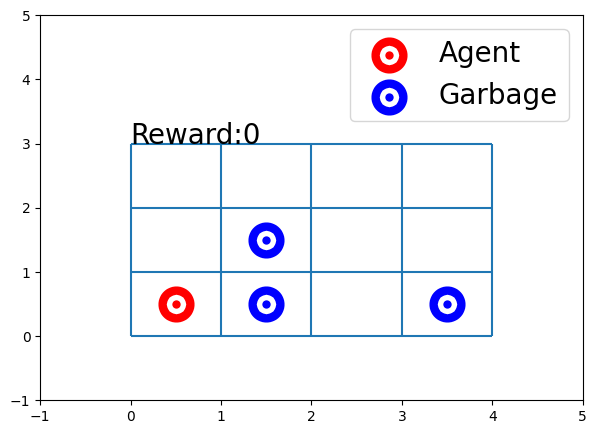

In [ ]:
#　Setting room
room3 = np.zeros((3, 4))
# Setting Garbage
room3[0][1] = 1
room3[1][1] = 1
room3[0][3] = 1

env =My_Room(room3)
env.plot_room()


In [ ]:
# Initialization

from collections import deque

# Neural Network
BATCH_SIZE = 32   # Batch size
TRAIN_INTERVAL = 50 # Training interval, when 10, we train the model once each 10 steps.
LR = 1e-2 # Learning rate

# RF (Reinforcement learning)

N_EPISODE = 2000     # Episode number (Epochs)
UPDATE_INTERVAL = 500 # Interval of update the TargetNet from PolicyNet
START_STEP = 200     # We start training after a certain steps
MAX_LEN = 512     # Max steps we save in our memory
GAMMA = 0.9 # Discount rate

# epsilon-greedy
EPSILON = 1.              # The initial value
EPSILON_DECREASE = 0.008  # Decrease speed
EPSILON_MIN = 0.01         # Minimum value
EPSILON_START = 300       # When to start decrease



cpu


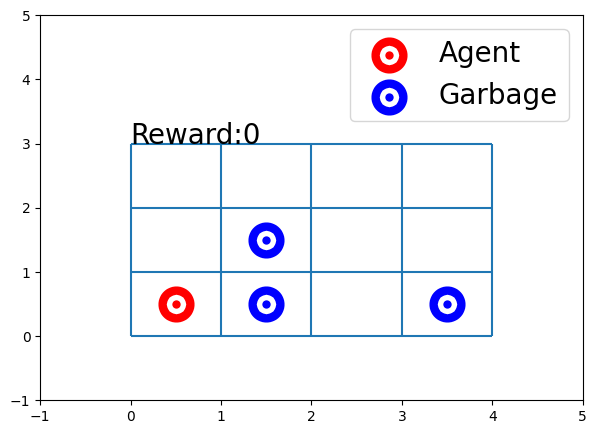

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
# Main code

from collections import deque
import torch.optim as optim
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from torch.nn import functional as F
import torch
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(0)
np.random.seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

memory = deque(maxlen=MAX_LEN) # List we store our data.

env =My_Room(room3)
env.plot_room()

# Agent
agent = My_DQN_Agent(env.actions)

init_state = env.start_pos

n_state = len(env.start_pos) # How many state (here we only use position so 2)

# Networks
policyN = My_Net(n_state, len(env.actions)).to(device)
targetN = My_Net(n_state, len(env.actions)).to(device)

optimizer = optim.Adam(policyN.parameters(), lr=LR)
criterion = nn.MSELoss()

epsilon = EPSILON # epsilon

total_steps = 0

# save total rewards for episodes
loss_history = []
rewards_history = []
epsilon_history = []

# interval of save the model
SAVE_INTERVAL = 100


# Start loop
for episode in tqdm(range(N_EPISODE)):

  # Initialize each loop
  end_of_episode = False
  episode_reward = 0
  env.reset()
  state =  torch.tensor(init_state).float()
  # Start episode
  while end_of_episode is False:

    ######################  1. Store the data ######################################

    #print(state)
    # Take action with the current state and PolicyNet
    maxq, action = agent.epsilon_greedy_act(epsilon=epsilon, states=state.view(1,-1).to(device), policyN=policyN)

    # Gains state change, reward, and end judgment in STEP.
    next_state, reward, end_of_episode = env.step(action)

    next_state = torch.tensor(next_state).float()
    #print(next_state)

    # Store the data
    # memory need: state, action, next_state, reward and end flag to calculate the formula (13.1)
    # in order to train in the torch, every elements should be scalar or 1st order tensor data.
    memory.append([state.view(-1), action, next_state.view(-1), reward, end_of_episode])

    # next_state <- state　Update
    state = next_state.clone()

    # cumulate the reward
    episode_reward += reward



    # Once a certain amount of data is accumulated, training begins
    ######################  2.  Start training #######################################

    # Check the size of the data
    if len(memory) > START_STEP:

      # Training interval
      if total_steps % TRAIN_INTERVAL == 0:

        # Make training batch from the memory
        memory_dataset = My_Memory_Data(memory)
        memory_loader = DataLoader(memory_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         drop_last=True)
        total_loss = 0
        for batch in memory_loader:
          state_batch = batch[0].to(device)
          action_batch = batch[1].to(device)
          next_state_batch = batch[2].to(device)
          reward_batch = batch[3].to(device)
          end_batch = batch[4].to(device)

          # Maxium q from policyNet
          q = policyN(state_batch)

          # q_{t+1}
          q_1_max = targetN(next_state_batch).max(1)[0].clone()

          q_hat = q.clone()
          for i in range(BATCH_SIZE):
            # q_hat = r + gamma * max(q_{t+1}) * end
            q_hat[i, action_batch[i]] = reward_batch[i] + GAMMA * q_1_max[i].data * (not end_batch[i])


          loss = criterion(q, q_hat)
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()

          total_loss = loss.item()

        loss_history.append(total_loss / len(memory_loader))



    ######################  3.  Update #######################################
    # step
    total_steps += 1

    # TargetNet
    if total_steps % UPDATE_INTERVAL == 0:
      # Transfer all the weights from PolicyNet
      targetN.load_state_dict(policyN.state_dict() )



  #### After one episode

  # epsilon
  if epsilon >= EPSILON_MIN and episode >= EPSILON_START:
    epsilon -= EPSILON_DECREASE


  rewards_history.append(episode_reward)
  epsilon_history.append(epsilon)

  # save
  if episode % SAVE_INTERVAL ==0:
    torch.save(policyN, f'PolicyNet_{episode}.torch')






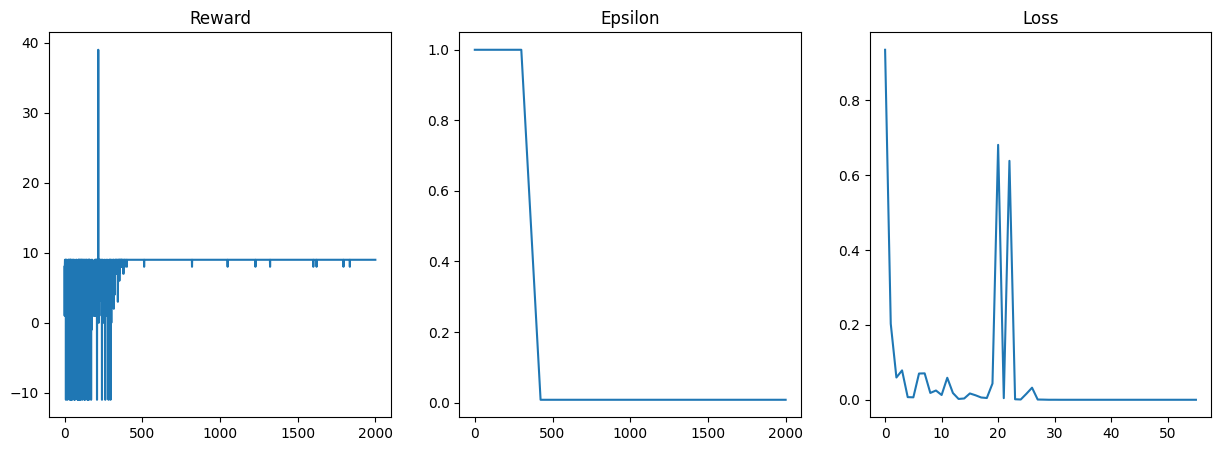

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(rewards_history)
plt.title('Reward')
plt.subplot(1,3,2)
plt.plot(epsilon_history)
plt.title('Epsilon')
plt.subplot(1,3,3)
plt.plot(loss_history)
plt.title('Loss')
plt.show()


### <font color='crimson'>Visualize the p-values</font>


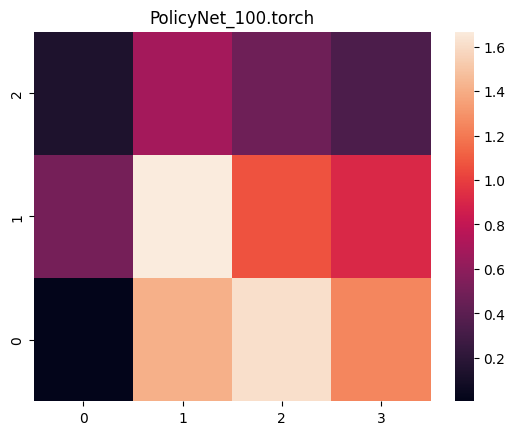

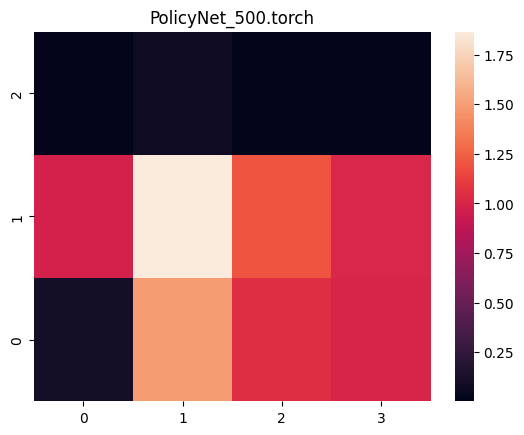

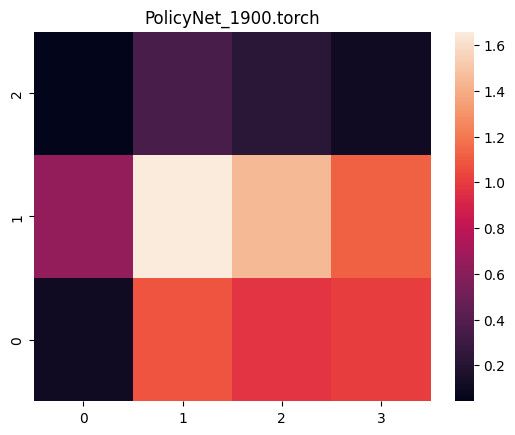

In [ ]:
import seaborn
def viz_p(policyN, model_path, env):
  policyN = torch.load(model_path,map_location=device)
  pvalues = np.zeros((env.H, env.W))

  for y in range(env.H):
    for x in range(env.W):
      ps = policyN(torch.tensor((x,y)).float().to(device)).data.numpy()

      # Softmax
      ps = np.exp(ps) / np.exp(ps).sum()
      #print(f'x:{x}, y:{y}')
      #print(ps)

      # 0 Up 1 Down 2 Left 3 Right

      # Up
      if y < env.H-1:
        pvalues[y+1, x] += ps[0]

      # Down
      if y > 0:
        pvalues[y-1, x] += ps[1]

      # Left
      if x > 0:
        pvalues[y, x-1] += ps[2]
      # RIght
      if x < env.W-1:
        pvalues[y, x+1] += ps[3]


  ax = seaborn.heatmap(pvalues)
  ax.invert_yaxis()
  plt.title(model_path)
  plt.show()

viz_p(policyN, 'PolicyNet_100.torch', env)
viz_p(policyN, 'PolicyNet_500.torch', env)
viz_p(policyN, 'PolicyNet_1900.torch', env)

## Extra - <font color="Crimson">State</font>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Environment Class

# A room with a garbage
class My_Room:

    def __init__(self, map=None):

        # Type of blocks
        self.block_type = {
            "N": 0,  # Normal Block
            "G": 1,  # Block with treasure
            "M": 2,  # Monster Block
            "S": 3,  # Sword Block
        }

        # Action
        self.actions = {
            "UP": 0,
            "DOWN": 1,
            "LEFT": 2,
            "RIGHT": 3
        }


        '''
        # Room

        # x o o o#   o Normal Block
        # + o o x#   * Block with garbage
                    + Position of Agent
        '''

        if map is None:

          self.room = np.zeros((2, 3))

          # Set the garbage
          self.room[1][2] = 1
        else:
          self.room = map.copy()


        self.H = len(self.room) #  Row number
        self.W = len(self.room[0]) # Column number

        # Initialize
        self.start_pos = (0, 0)   # Start point of agent
        self.agent_pos = self.start_pos

        # Save
        self.total_reward = 0 # reward
        self.steps = 0

        # Max step
        self.max_step = 20

        # sword
        self.equip_sword = 0

    def move(self, action):
      new_x, new_y = self.agent_pos

      if action == self.actions["UP"]:
          new_y += 1
      elif action == self.actions["DOWN"]:
          new_y += -1
      elif action == self.actions["LEFT"]:
          new_x += -1
      elif action == self.actions["RIGHT"]:
          new_x += 1


      # Won't move if it reaches to the end of the block
      Over = False
      if new_x < 0 or new_x >= self.W:
          Over = True

      if new_y <0 or new_y >= self.H:
          Over = True

      # If there are any other conditions

      ##

      # If can not move, we will stay in the current position.
      if Over:
        return self.agent_pos[0], self.agent_pos[1]

      else:
        return new_x, new_y


    def step(self, action):
        """
        input:
              action: The action the agent took

        output:
              state : The position of the agent
              reward: reward got from this action
              end   : check if the episode is end
        """

        # 1. Move
        new_x, new_y = self.move(action)

        # 2. Update position
        self.agent_pos = new_x, new_y

        # 3. Calculate reward
        reward = self.reward(new_x, new_y)
        self.total_reward += reward

        # 4. Check whether the episode is over.
        is_goal = self.end_of_episode(new_x, new_y)
        self.steps += 1

        # state update
        state = self.agent_pos + (self.equip_sword,)

        return state, reward, is_goal

    def end_of_episode(self, x, y):


        """
        Function to check if the we reach the end of the episode.
        In this case, we only need to arrive at the block where the treasure is located, so we can make a decision based on the current coordinates alone.
        """
        if self.room[y][x] == self.block_type["G"] or self.steps==self.max_step:      # If we arrived at the block with garbage
            return True
        else:
            return False

    def reward(self, x, y):
        # Normal Block -1
        if self.room[y][x] == self.block_type["N"]:
            return -1

        # Treasure Block
        if self.room[y][x] == self.block_type["G"]:
          return 49

        # Monster Block
        if self.room[y][x] == self.block_type["M"]:
          if self.equip_sword == 1:
            return -11
          else:
            return -51

        # Sword Block
        if self.room[y][x] == self.block_type["S"]:
          self.equip_sword = 1
          return -1




    def reset(self):
        self.agent_pos = self.start_pos
        self.steps = 0
        self.total_reward = 0
        self.equip_sword = 0
        return self.start_pos

    def plot_room(self):
        np_room = np.array(self.room)
        shape = np_room.shape

        # Use red ● to display Agent

        plt.figure(figsize=(7, 7))
        plt.scatter(self.agent_pos[0] + 0.5, self.agent_pos[1] + 0.5, lw=20, color='red')

        # Use yellow ● to display garbage

        g_pos = np.where(np_room == 1) # Position of garbage
        n_g = len(g_pos[0]) # Number of Garbage
        gx = [] # Axis x
        gy = [] # Axis y

        for i in range(n_g):
          plt.scatter(g_pos[1][i]+0.5, g_pos[0][i]+0.5, lw=20, color='yellow')

        # Use blue ● to display monster

        g_pos = np.where(np_room == 2) # Position of monster
        n_g = len(g_pos[0]) # Number of monster
        gx = [] # Axis x
        gy = [] # Axis y

        for i in range(n_g):
          plt.scatter(g_pos[1][i]+0.5, g_pos[0][i]+0.5, lw=20, color='blue')

        # Use blue ● to display sword

        g_pos = np.where(np_room == 3) # Position of sword
        n_g = len(g_pos[0]) # Number of sword
        gx = [] # Axis x
        gy = [] # Axis y

        for i in range(n_g):
          plt.scatter(g_pos[1][i]+0.5, g_pos[0][i]+0.5, lw=20, color='green')

        ## Show Blocks
        # y
        for y in range(shape[0]+1):
          plt.hlines(y, 0, shape[1])

        # x
        for x in range(shape[1]+1):
          plt.vlines(x, 0, shape[0])


        plt.xlim(-1, shape[1] + 1)
        plt.ylim(-1, shape[0] + 2)

        plt.legend(['Agent','Treaser', 'Monster', 'Sword'],labelcolor=['red','yellow','blue','green'], fontsize=20)

        plt.grid(False)

        # reward plot
        plt.text(0, self.H+1, f'Reward:{self.total_reward}', fontsize=20)

        plt.show()





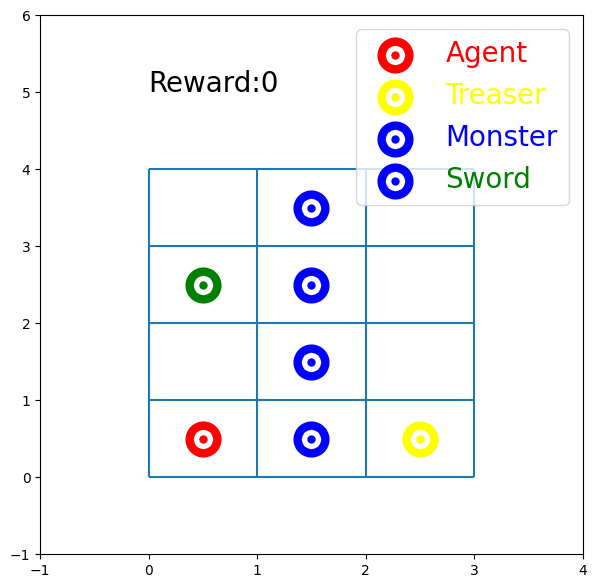

In [ ]:
#　Setting room
room4 = np.zeros((4, 3))
# Setting Garbage
room4[0][2] = 1
room4[:,1] = 2
room4[2,0] = 3

env =My_Room(room4)
env.plot_room()


Assuming encounter a monster:

Without a Sword: - 50 penaly

With a Sword: - 10 penaly

Here, let us consider about the state.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=14xCcds7p9KIpq3ewIOpIzVnPLW2PY9S-" width="80%">

**Figure 13.3  State**


In [ ]:
# Initialization

from collections import deque

# Neural Network
BATCH_SIZE = 32   # Batch size
TRAIN_INTERVAL = 50 # Training interval, when 10, we train the model once each 10 steps.
LR = 1e-3 # Learning rate

# RF (Reinforcement learning)

N_EPISODE = 2000     # Episode number (Epochs)
UPDATE_INTERVAL = 500 # Interval of update the TargetNet from PolicyNet
START_STEP = 200     # We start training after a certain steps
MAX_LEN = 512     # Max steps we save in our memory
GAMMA = 0.9 # Discount rate

# epsilon-greedy
EPSILON = 1.              # The initial value
EPSILON_DECREASE = 0.001  # Decrease speed
EPSILON_MIN = 0.01         # Minimum value
EPSILON_START = 300       # When to start decrease



cpu


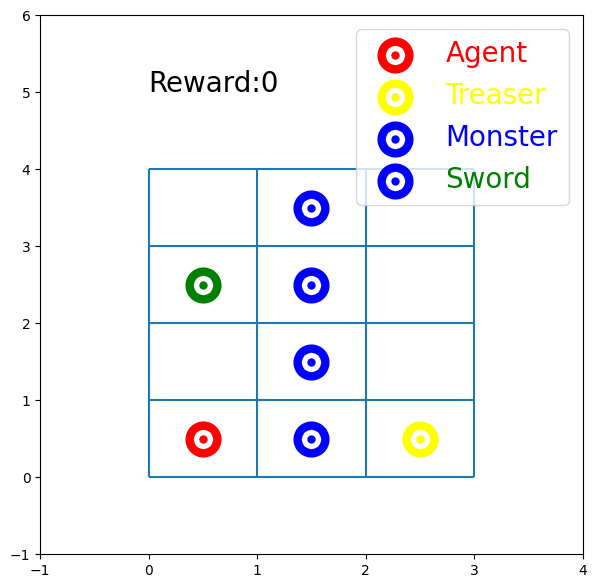

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
# Main code

from collections import deque
import torch.optim as optim
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from torch.nn import functional as F
import torch
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(0)
np.random.seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

memory = deque(maxlen=MAX_LEN) # List we store our data.

env =My_Room(room4)
env.plot_room()

# Agent
agent = My_DQN_Agent(env.actions)

# State must include the equip sword status
init_state = env.start_pos + (env.equip_sword,)

n_state = len(init_state) # How many state (x, y and sword status so 3)

# Networks
policyN = My_Net(n_state, len(env.actions)).to(device)
targetN = My_Net(n_state, len(env.actions)).to(device)

optimizer = optim.Adam(policyN.parameters(), lr=LR)
criterion = nn.MSELoss()

epsilon = EPSILON # epsilon

total_steps = 0

# save total rewards for episodes
loss_history = []
rewards_history = []
epsilon_history = []

# interval of save the model
SAVE_INTERVAL = 10


# Start loop
for episode in tqdm(range(N_EPISODE)):

  # Initialize each loop
  end_of_episode = False
  episode_reward = 0
  env.reset()
  state =  torch.tensor(init_state).float()
  # Start episode
  while end_of_episode is False:

    ######################  1. Store the data ######################################

    #print(state)
    # Take action with the current state and PolicyNet
    maxq, action = agent.epsilon_greedy_act(epsilon=epsilon, states=state.view(1,-1).to(device), policyN=policyN)

    # Gains state change, reward, and end judgment in STEP.
    next_state, reward, end_of_episode = env.step(action)

    next_state = torch.tensor(next_state).float()
    #print(next_state)

    # Store the data
    # memory need: state, action, next_state, reward and end flag to calculate the formula (13.1)
    # in order to train in the torch, every elements should be scalar or 1st order tensor data.
    memory.append([state.view(-1), action, next_state.view(-1), reward, end_of_episode])

    # next_state <- state　Update
    state = next_state.clone()

    # cumulate the reward
    episode_reward += reward



    # Once a certain amount of data is accumulated, training begins
    ######################  2.  Start training #######################################

    # Check the size of the data
    if len(memory) > START_STEP:

      # Training interval
      if total_steps % TRAIN_INTERVAL == 0:

        # Make training batch from the memory
        memory_dataset = My_Memory_Data(memory)
        memory_loader = DataLoader(memory_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=True,
                         drop_last=True)
        total_loss = 0
        for batch in memory_loader:
          state_batch = batch[0].to(device)
          action_batch = batch[1].to(device)
          next_state_batch = batch[2].to(device)
          reward_batch = batch[3].to(device)
          end_batch = batch[4].to(device)

          # Maxium q from policyNet
          q = policyN(state_batch)

          # q_{t+1}
          q_1_max = targetN(next_state_batch).max(1)[0].clone()

          q_hat = q.clone()
          for i in range(BATCH_SIZE):
            # q_hat = r + gamma * max(q_{t+1}) * end
            q_hat[i, action_batch[i]] = reward_batch[i] + GAMMA * q_1_max[i].data * (not end_batch[i])


          loss = criterion(q, q_hat)
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()

          total_loss = loss.item()

        loss_history.append(total_loss / len(memory_loader))



    ######################  3.  Update #######################################
    # step
    total_steps += 1

    # TargetNet
    if total_steps % UPDATE_INTERVAL == 0:
      # Transfer all the weights from PolicyNet
      targetN.load_state_dict(policyN.state_dict() )



  #### After one episode

  # epsilon
  if epsilon >= EPSILON_MIN and episode >= EPSILON_START:
    epsilon -= EPSILON_DECREASE


  rewards_history.append(episode_reward)
  epsilon_history.append(epsilon)

  # save
  if episode % SAVE_INTERVAL ==0:
    torch.save(policyN, f'PolicyNet_{episode}.torch')






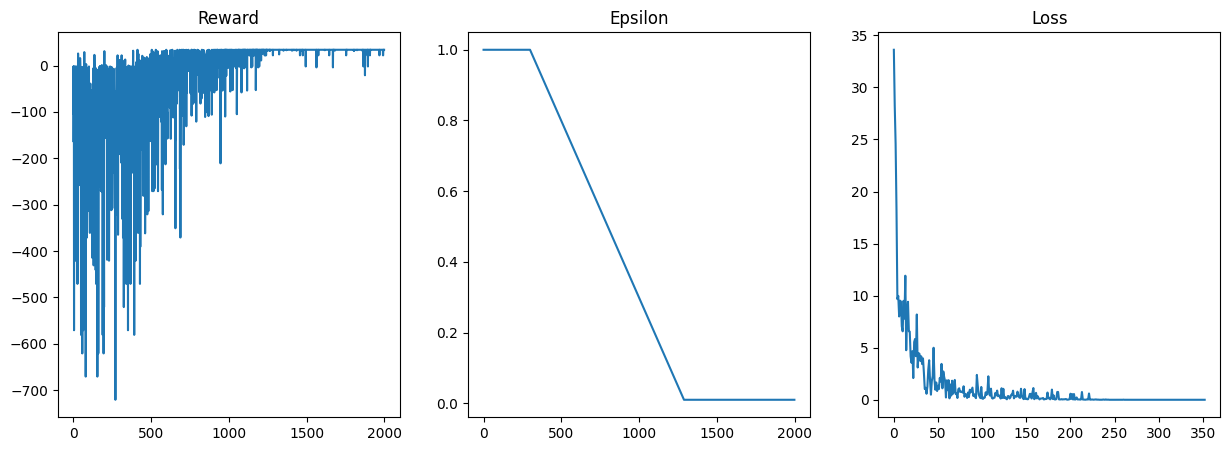

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(rewards_history)
plt.title('Reward')
plt.subplot(1,3,2)
plt.plot(epsilon_history)
plt.title('Epsilon')
plt.subplot(1,3,3)
plt.plot(loss_history)
plt.title('Loss')
plt.show()


### <font color='crimson'>Visualize the p-values with different state</font>

It is clear that the p values in each position will be different depend on whether the agent equiped a sword or not.

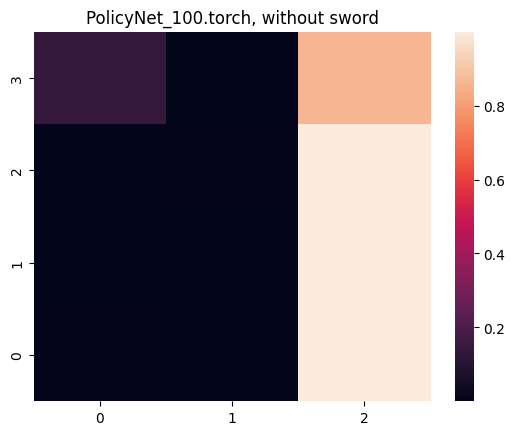

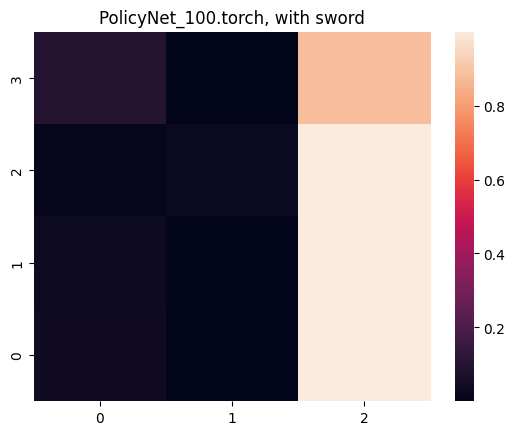

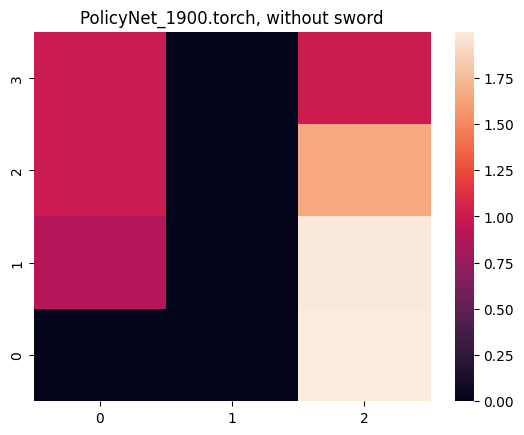

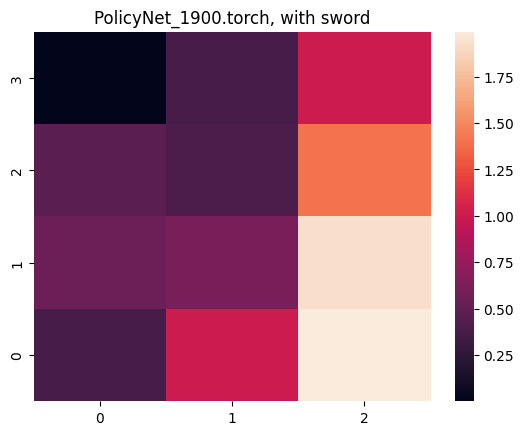

In [ ]:
import seaborn
def viz_p2(policyN, model_path, env, sword):
  policyN = torch.load(model_path,map_location=device)
  pvalues = np.zeros((env.H, env.W))

  for y in range(env.H):
    for x in range(env.W):
      ps = policyN(torch.tensor((x,y, sword)).float().to(device)).data.numpy()

      # Softmax
      ps = np.exp(ps) / np.exp(ps).sum()
      #print(f'x:{x}, y:{y}')
      #print(ps)

      # 0 Up 1 Down 2 Left 3 Right

      # Up
      if y < env.H-1:
        pvalues[y+1, x] += ps[0]

      # Down
      if y > 0:
        pvalues[y-1, x] += ps[1]

      # Left
      if x > 0:
        pvalues[y, x-1] += ps[2]
      # RIght
      if x < env.W-1:
        pvalues[y, x+1] += ps[3]


  ax = seaborn.heatmap(pvalues)
  ax.invert_yaxis()

  sub = 'with sword' if sword==1 else 'without sword'
  plt.title(f'{model_path}, {sub}')
  plt.show()

viz_p2(policyN, 'PolicyNet_100.torch', env, 0)
viz_p2(policyN, 'PolicyNet_100.torch', env, 1)

viz_p2(policyN, 'PolicyNet_1900.torch', env, 0)
viz_p2(policyN, 'PolicyNet_1900.torch', env, 1)